In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from joblib import dump, load 

In [69]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [70]:
dummy = pd.get_dummies(df['Extracurricular Activities'],dtype=int)
dummy.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [71]:
df=pd.concat([dummy,df],axis='columns')
df.head()

,No,Yes,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0,1,7,99,Yes,9,1,91.0
1,1,0,4,82,No,4,2,65.0
2,0,1,8,51,Yes,7,2,45.0
3,0,1,5,52,Yes,5,2,36.0
4,1,0,7,75,No,8,5,66.0


In [72]:
df_final = df.drop(['Extracurricular Activities','No'],axis='columns')
df_final.head()

,Yes,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,1,7,99,9,1,91.0
1,0,4,82,4,2,65.0
2,1,8,51,7,2,45.0
3,1,5,52,5,2,36.0
4,0,7,75,8,5,66.0


In [73]:
X = df_final.drop('Performance Index',axis='columns')
X.head()

,Yes,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,1,7,99,9,1
1,0,4,82,4,2
2,1,8,51,7,2
3,1,5,52,5,2
4,0,7,75,8,5


In [74]:
Y = df_final['Performance Index']
Y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [76]:
# model.predict([[Extracurricular_Activities,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced]])
model.predict([[1,7,99,9,1]])

c:\Users\oc110\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.86229997])

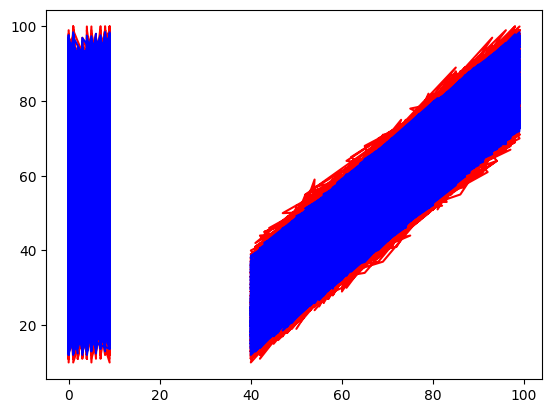

In [77]:
plt.plot(X,Y,c='r')
plt.plot(X,model.predict(X),c='b')

In [78]:
model.score(X_test,Y_test)
# model is 98.8% of accurate

0.9886543202866286

In [79]:
dump(model,'Student_Performance_model')

['Student_Performance_model']